# Decision Tree Programming Assignment 

### by Joshua Rodriguez


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.io import arff
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# EDA

In [76]:
df = pd.read_excel('Real estate valuation data set.xlsx')
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [117]:
df.dtypes

No                                           int64
X1 transaction date                        float64
X2 house age                               float64
X3 distance to the nearest MRT station     float64
X4 number of convenience stores              int64
X5 latitude                                float64
X6 longitude                               float64
Y house price of unit area                 float64
X2 house age_group                        category
dtype: object

# Missing Values

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [78]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

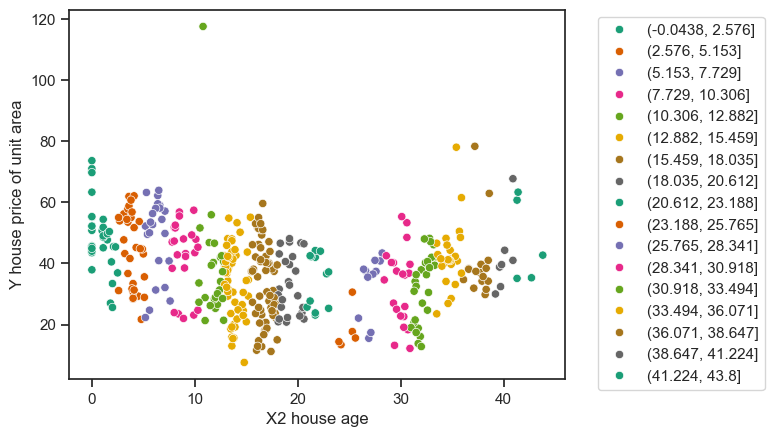

In [138]:
df['X2 house age_group'] = pd.cut(df['X2 house age'], bins=17)
sns.scatterplot(x='X2 house age', y='Y house price of unit area', data=df, hue='X2 house age_group', palette='Dark2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

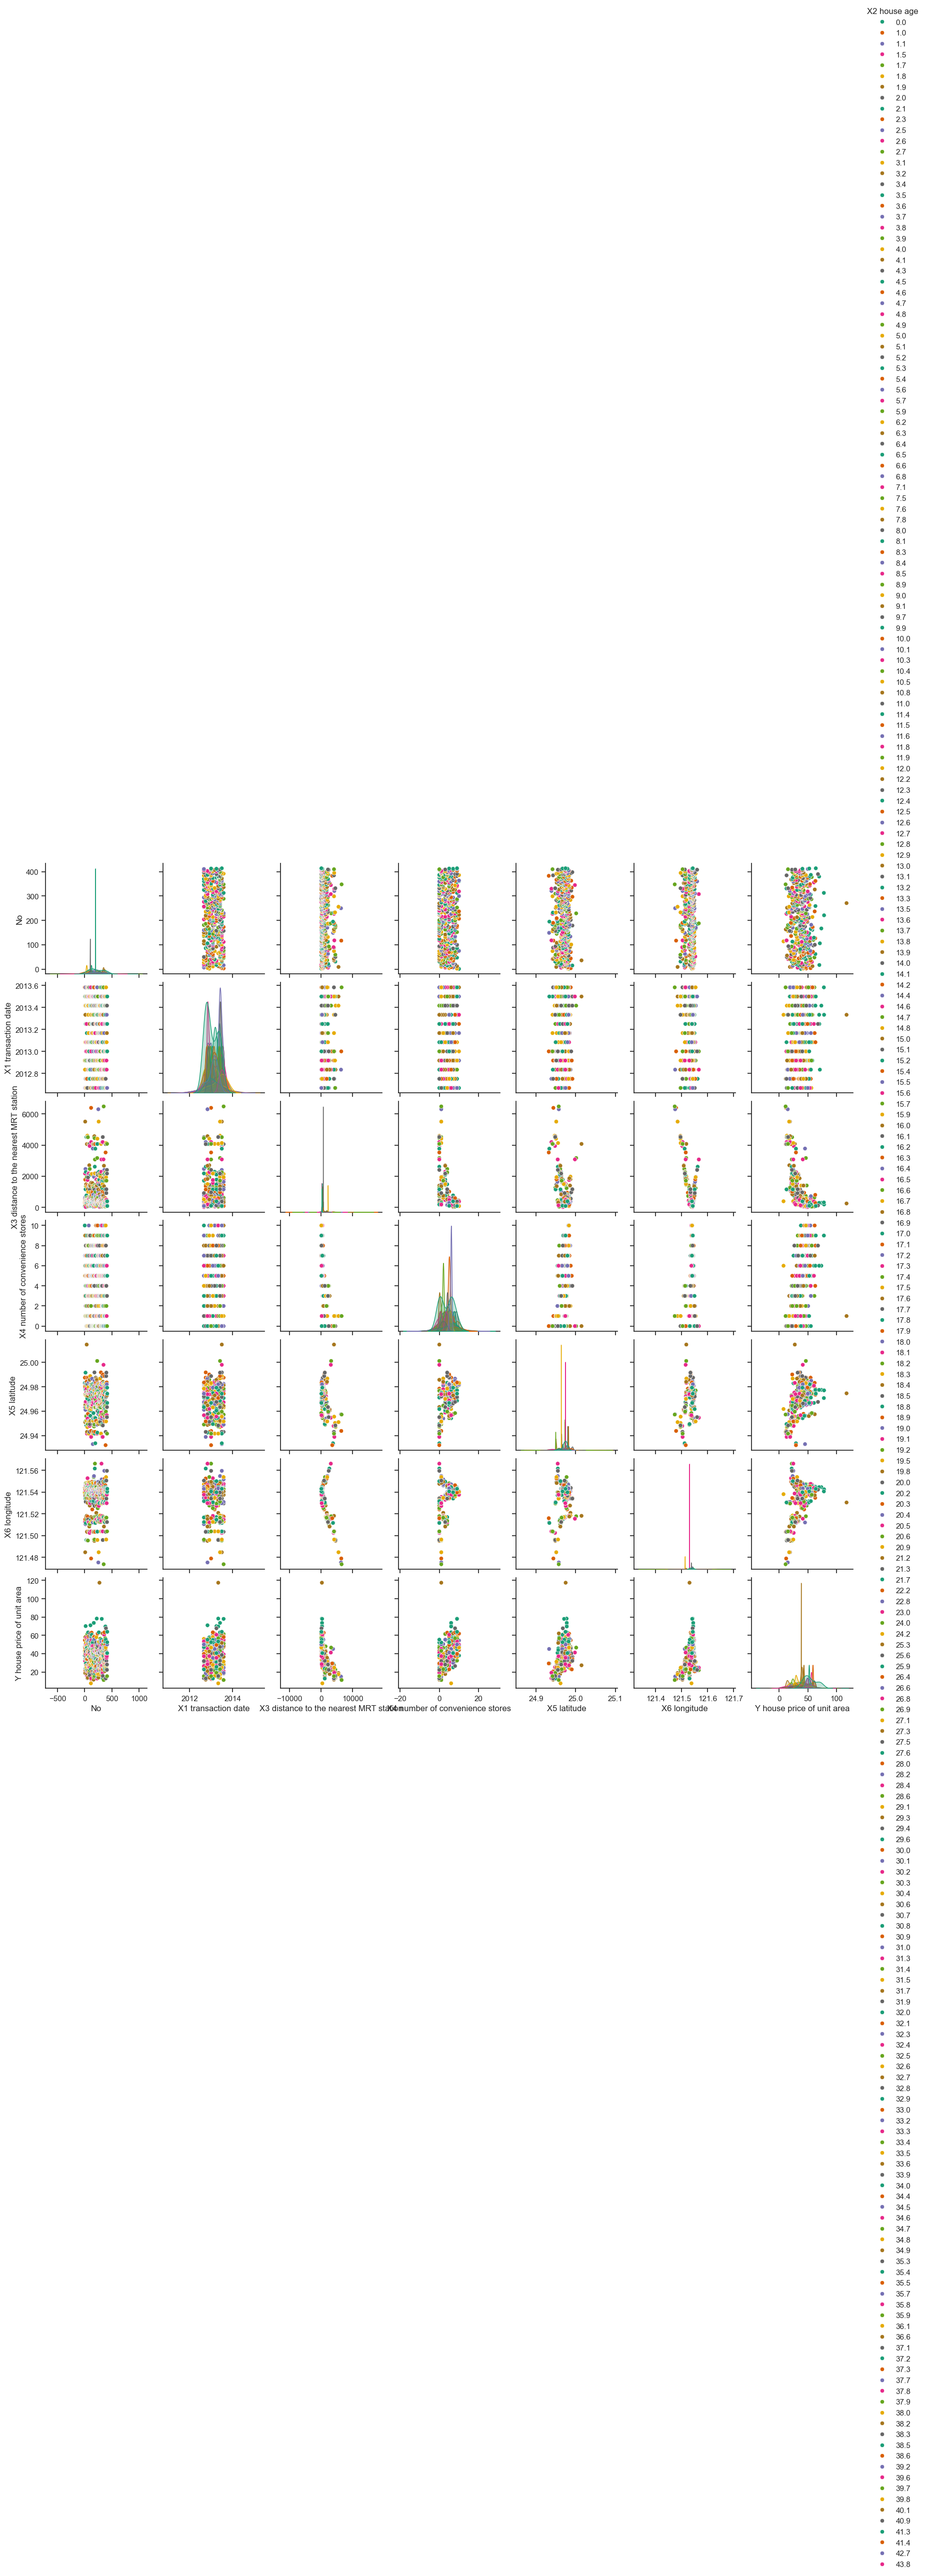

In [82]:
sns.pairplot(df,hue='X2 house age',palette='Dark2')

# Train | Test Split 


In [143]:
df.drop('X2 house age_group', axis=1, inplace=True)
df = df.astype(float)

In [148]:
df['Y_binned'] = pd.cut(df['Y house price of unit area'], bins=3, labels=['low', 'medium', 'high'])
X = df.drop(columns=['No', 'Y house price of unit area', 'Y_binned'])
y = df['Y_binned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Shape of X_train: (289, 6)
Shape of X_test: (125, 6)
Shape of y_train: (289,)
Shape of y_test: (125,)


# Decision Tree Classifier


### Default Hyperparameters


In [149]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

DecisionTreeClassifier <br>
#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [153]:
y_pred = model.predict(X_test)
labels = model.classes_

# Evaluation

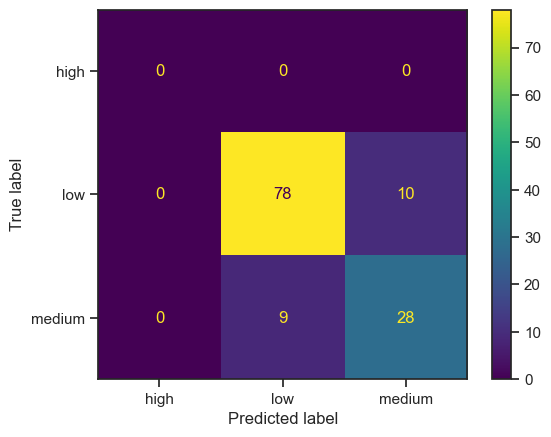

In [154]:
cm = confusion_matrix(y_test, y_pred, labels=labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

cmd.plot()
plt.show()


In [155]:
print(classification_report(y_test,base_pred))


              precision    recall  f1-score   support

         low       0.90      0.89      0.89        88
      medium       0.74      0.76      0.75        37

    accuracy                           0.85       125
   macro avg       0.82      0.82      0.82       125
weighted avg       0.85      0.85      0.85       125



In [156]:
model.feature_importances_

array([0.10217161, 0.18824957, 0.41757957, 0.0308309 , 0.11435579,
       0.14681256])

In [161]:
feature_names = X.columns
feature_importances = model.feature_importances_
pd.DataFrame(data=feature_importances, index=feature_names, columns=['Feature Importance'])

,Feature Importance
X1 transaction date,0.102172
X2 house age,0.188250
X3 distance to the nearest MRT station,0.417580
X4 number of convenience stores,0.030831
X5 latitude,0.114356
X6 longitude,0.146813


# Visualize the Tree

[Text(0.5298295454545454, 0.9545454545454546, 'x[2] <= 390.769\ngini = 0.428\nsamples = 289\nvalue = [1, 200, 88]'),
 Text(0.3153409090909091, 0.8636363636363636, 'x[1] <= 11.5\ngini = 0.484\nsamples = 122\nvalue = [1, 47, 74]'),
 Text(0.20454545454545456, 0.7727272727272727, 'x[5] <= 121.541\ngini = 0.309\nsamples = 59\nvalue = [1, 10, 48]'),
 Text(0.1590909090909091, 0.6818181818181818, 'x[3] <= 7.5\ngini = 0.473\nsamples = 29\nvalue = [1, 9, 19]'),
 Text(0.13636363636363635, 0.5909090909090909, 'x[0] <= 2013.375\ngini = 0.54\nsamples = 21\nvalue = [1, 9, 11]'),
 Text(0.11363636363636363, 0.5, 'x[0] <= 2013.042\ngini = 0.547\nsamples = 17\nvalue = [1, 9, 7]'),
 Text(0.06818181818181818, 0.4090909090909091, 'x[0] <= 2012.792\ngini = 0.42\nsamples = 10\nvalue = [0, 3, 7]'),
 Text(0.045454545454545456, 0.3181818181818182, 'x[0] <= 2012.708\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.022727272727272728, 0.22727272727272727, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(

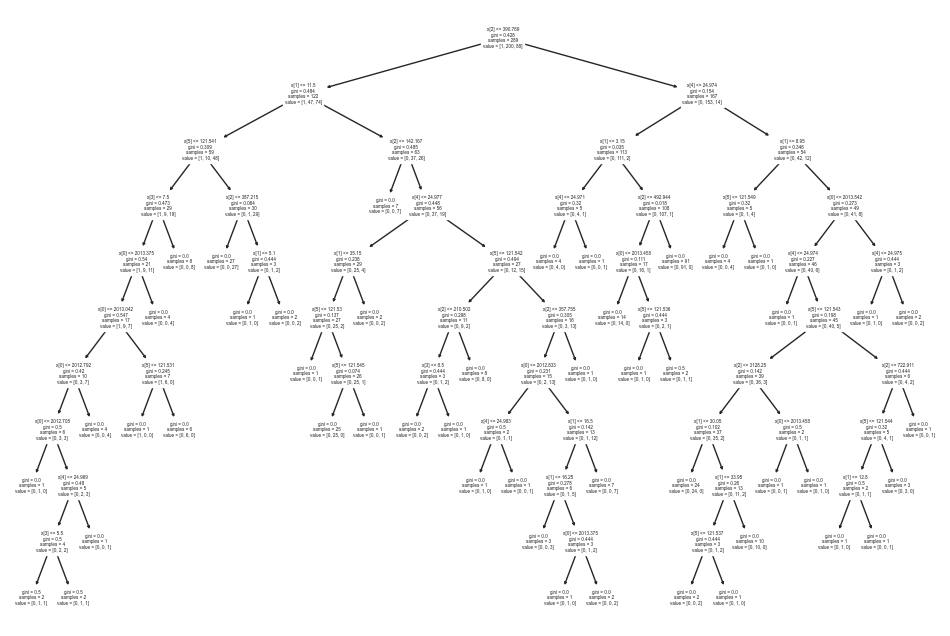

In [162]:
plt.figure(figsize=(12,8))
plot_tree(model)

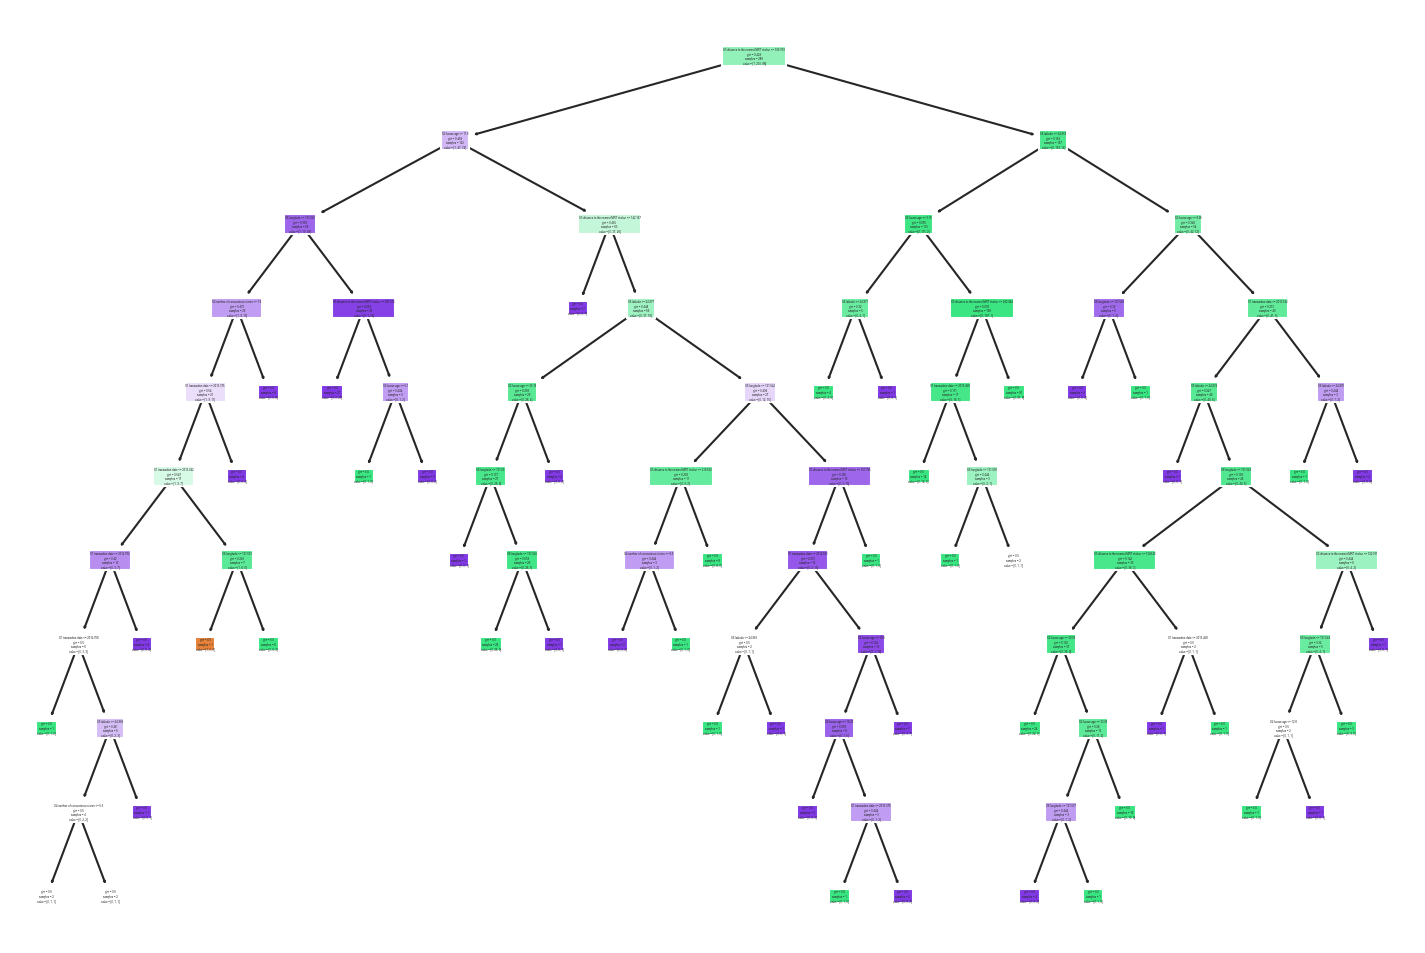

In [166]:
plt.figure(figsize=(12, 8), dpi=150)
plot_tree(model, filled=True, feature_names=X.columns.tolist())
plt.show()

# Reporting Model Results


In [173]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12, 8), dpi=150)
    plot_tree(model, filled=True, feature_names=X.columns.tolist())
    plt.show()

## Understanding Hyperparameters
#### Max Depth

In [174]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

DecisionTreeClassifier(max_depth=2) <br>
###### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

              precision    recall  f1-score   support

         low       0.82      1.00      0.90        88
      medium       1.00      0.49      0.65        37

    accuracy                           0.85       125
   macro avg       0.91      0.74      0.78       125
weighted avg       0.87      0.85      0.83       125





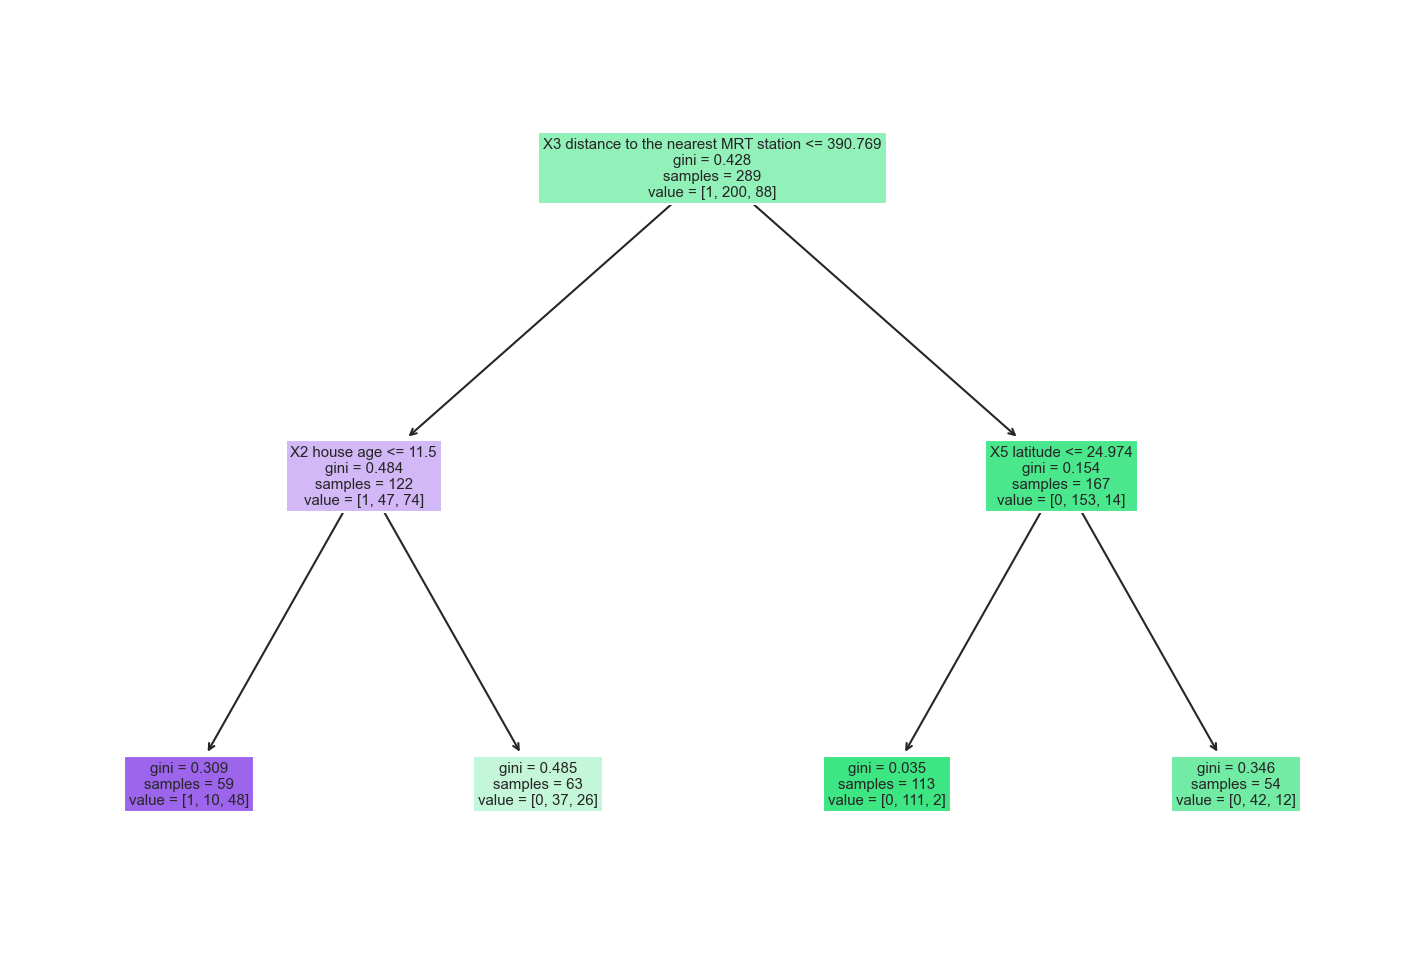

In [175]:
report_model(pruned_tree)

### Max Leaf Nodes

In [177]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

DecisionTreeClassifier(max_leaf_nodes=3) <br>
##### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

              precision    recall  f1-score   support

         low       0.82      1.00      0.90        88
      medium       1.00      0.49      0.65        37

    accuracy                           0.85       125
   macro avg       0.91      0.74      0.78       125
weighted avg       0.87      0.85      0.83       125





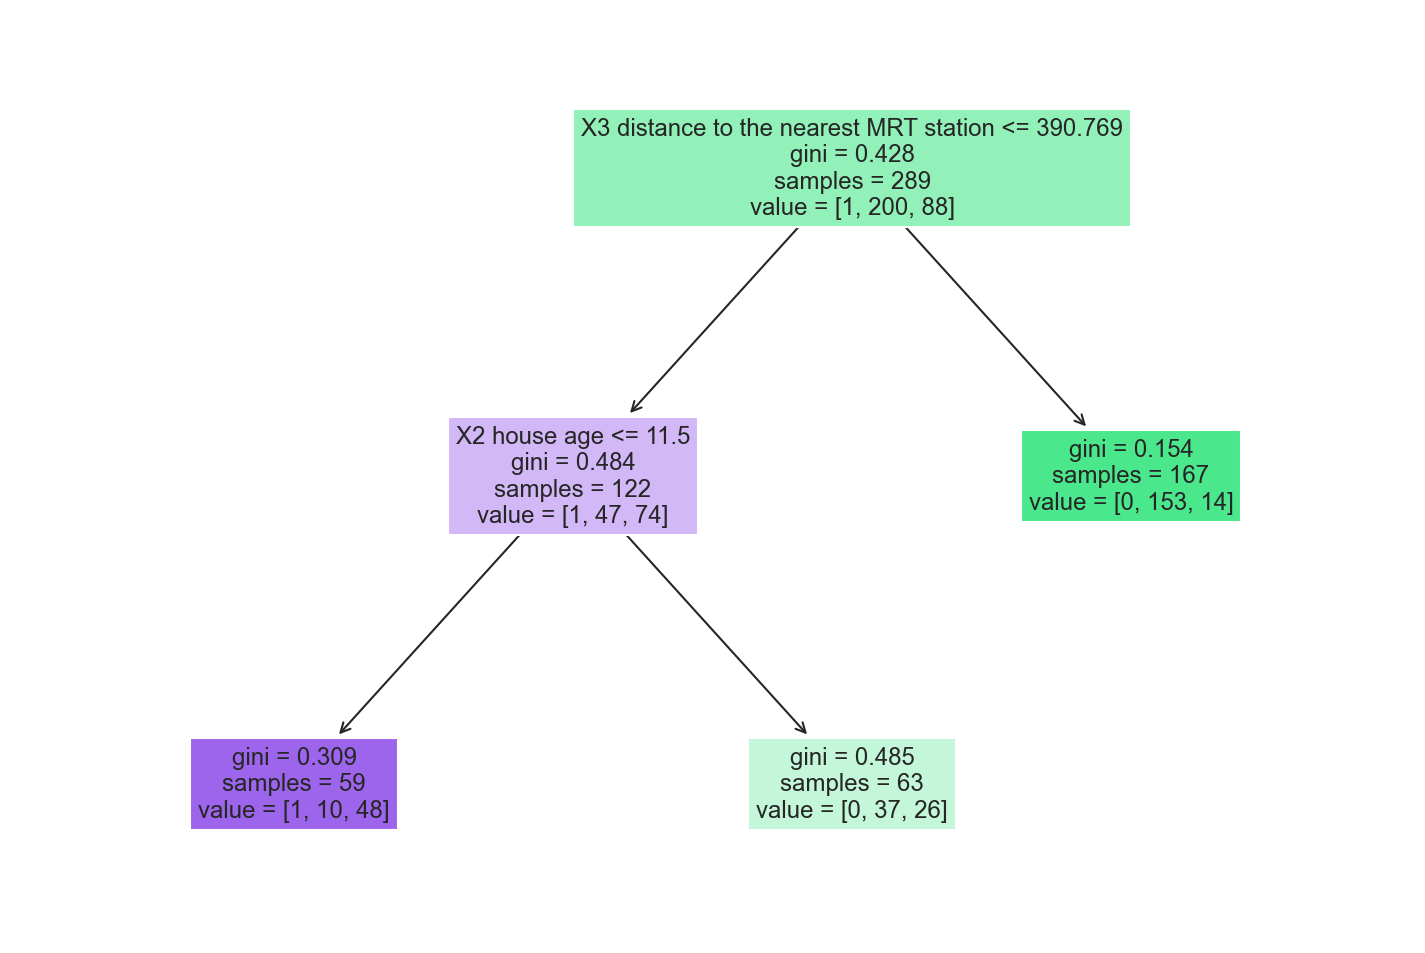

In [178]:
report_model(pruned_tree)

# Criterion

In [179]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

DecisionTreeClassifier(criterion='entropy') <br>
##### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

              precision    recall  f1-score   support

         low       0.87      0.92      0.90        88
      medium       0.78      0.68      0.72        37

    accuracy                           0.85       125
   macro avg       0.83      0.80      0.81       125
weighted avg       0.84      0.85      0.84       125





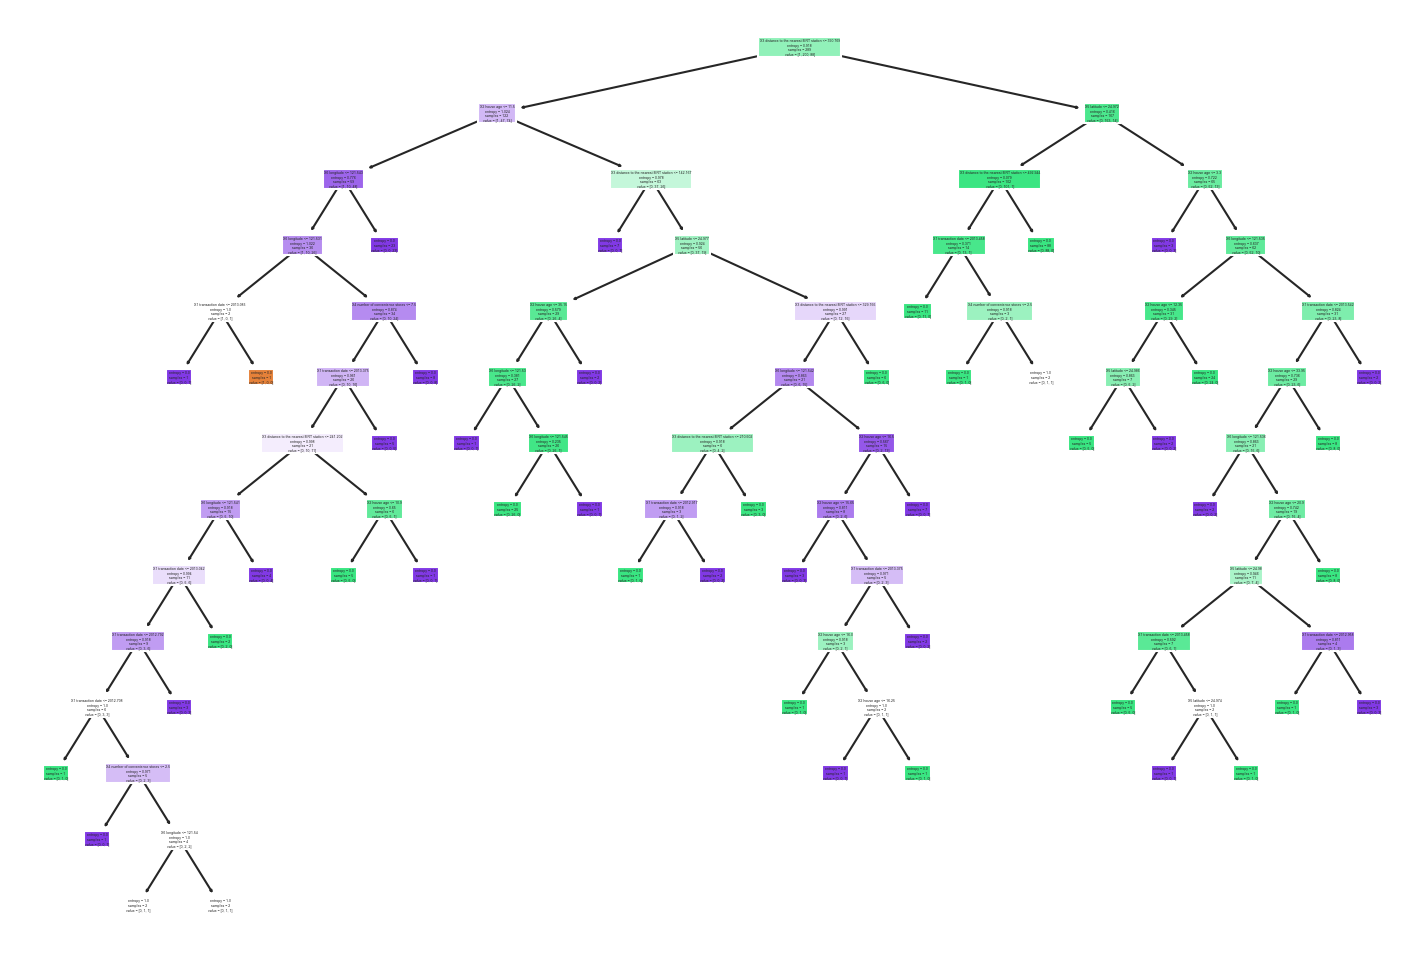

In [181]:
report_model(entropy_tree)